<a href="https://colab.research.google.com/github/shahd1995913/Deepfake-Privacy-Preserving-AI-Based-Early-Fall-Detection-for-our-Elders/blob/main/(Facial%20Expression%20Recognition%20and%20pose%20estimation/Facial_Expression_Recognition_By_DeepFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install DeepFace
!pip install deepface

from deepface import DeepFace
import cv2
from google.colab import files
import matplotlib.pyplot as plt
# ========================
# 1) Install Dependencies
# ========================
!pip install deepface retina-face

!pip install -q deepface mtcnn opencv-python-headless==4.7.0.72


Saving c0261819-800px-wm.jpg to c0261819-800px-wm.jpg


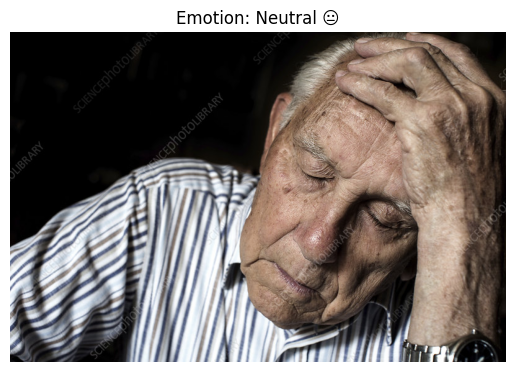

Original model output: neutral
Custom label: Neutral 😐


In [4]:
# Upload image from your computer
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Analyze the face and detect emotions
result = DeepFace.analyze(img_path=image_path, actions=['emotion'], enforce_detection=False)

# Read the image
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Extract the detected emotion
detected_emotion = result[0]['dominant_emotion']

# Map standard emotions to your custom descriptions
mapping = {
    "happy": "Happy 😊",
    "sad": "Sad 😢",
    "neutral": "Neutral 😐",
    "angry": "Angry 😠",
    "fear": "Confused 😨",
    "surprise": "Surprised 😲",
    "disgust": "Sick 🤢",
    "tired": "Tired 😴",
    "sleepy": "Sleepy 💤"
}

# Match the detected emotion to your custom list
custom_emotion = mapping.get(detected_emotion.lower(), detected_emotion)

# Display the image with the detected emotion
plt.imshow(img_rgb)
plt.axis('off')
plt.title(f"Emotion: {custom_emotion}")
plt.show()

print("Original model output:", detected_emotion)
print("Custom label:", custom_emotion)

Please upload an image...


Saving c0261819-800px-wm.jpg to c0261819-800px-wm (1).jpg


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5


25-08-11 21:17:27 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


100%|██████████| 119M/119M [00:00<00:00, 174MB/s]


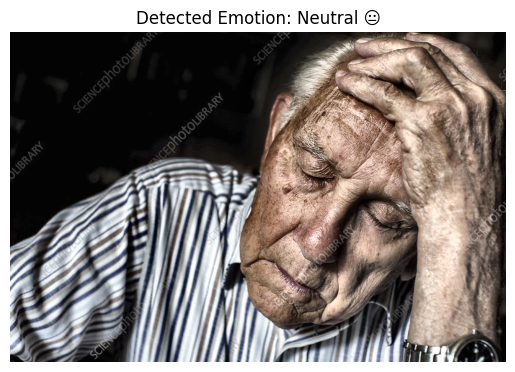

===== Emotion Probabilities =====
angry: 0.00%
disgust: 0.00%
fear: 0.00%
happy: 0.00%
sad: 0.37%
surprise: 0.00%
neutral: 99.63%

Dominant (model): neutral
Custom label: Neutral 😐


In [5]:


from deepface import DeepFace
import cv2
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np

# ========================
# 2) Upload Image
# ========================
print("Please upload an image...")
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# ========================
# 3) Preprocess Image (CLAHE for better lighting)
# ========================
def enhance_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        raise ValueError("Error: Could not read the image.")
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img_yuv[:,:,0] = clahe.apply(img_yuv[:,:,0])
    img_proc = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
    return img_proc

img_proc = enhance_image(image_path)
cv2.imwrite("processed.jpg", img_proc)

# ========================
# 4) Analyze Emotion
# ========================
result = DeepFace.analyze(
    img_path="processed.jpg",
    actions=['emotion'],
    detector_backend='retinaface',
    enforce_detection=True
)

# DeepFace may return list if multiple faces
face_res = result[0] if isinstance(result, list) else result

# Original detected emotion
detected_emotion = face_res['dominant_emotion']

# ========================
# 5) Map Emotions to Custom Labels
# ========================
mapping = {
    "happy": "Happy 😊",
    "sad": "Sad 😢",
    "neutral": "Neutral 😐",
    "angry": "Angry 😠",
    "fear": "Confused 😨",
    "surprise": "Surprised 😲",
    "disgust": "Sick 🤢",
    "tired": "Tired 😴",
    "sleepy": "Sleepy 💤"
}

custom_emotion = mapping.get(detected_emotion.lower(), detected_emotion)

# ========================
# 6) Show Results
# ========================
# Read image for display
img_rgb = cv2.cvtColor(img_proc, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')
plt.title(f"Detected Emotion: {custom_emotion}")
plt.show()

# Show all emotion scores
print("===== Emotion Probabilities =====")
for emotion, score in face_res['emotion'].items():
    print(f"{emotion}: {score:.2f}%")

print("\nDominant (model):", detected_emotion)
print("Custom label:", custom_emotion)

In [13]:
# ========================
# 1) Install Dependencies
# ========================
!pip install -q deepface mtcnn opencv-python-headless==4.7.0.72

import cv2
import numpy as np
from deepface import DeepFace
from google.colab import files
from base64 import b64encode
from IPython.display import HTML, display
from mtcnn import MTCNN

print("Please upload a video...")
uploaded = files.upload()
video_path = list(uploaded.keys())[0]
print(f"Video uploaded: {video_path}")

mapping = {
    "happy": "Happy 😊",
    "sad": "Sad 😢",
    "neutral": "Neutral 😐",
    "angry": "Angry 😠",
    "fear": "Confused 😨",
    "surprise": "Surprised 😲",
    "disgust": "Sick 🤢",
    "tired": "Tired 😴",
    "sleepy": "Sleepy 💤"
}

def enhance_frame(frame):
    img_yuv = cv2.cvtColor(frame, cv2.COLOR_BGR2YUV)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img_yuv[:,:,0] = clahe.apply(img_yuv[:,:,0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    raise IOError(f"Cannot open video file {video_path}")

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(f"Video properties - FPS: {fps}, Width: {width}, Height: {height}")

out = cv2.VideoWriter('f.mp4', fourcc, fps, (width, height))
detector = MTCNN()

SKIP_FRAMES = 5
frame_count = 0
processed_faces = 0

while True:
    ret, frame = cap.read()
    if not ret:
        print("End of video reached.")
        break

    frame_count += 1
    enhanced = enhance_frame(frame)

    if frame_count % SKIP_FRAMES == 0:
        rgb = cv2.cvtColor(enhanced, cv2.COLOR_BGR2RGB)
        faces = detector.detect_faces(rgb)
        print(f"Frame {frame_count}: Detected {len(faces)} face(s)")

        for face in faces:
            x, y, w, h = face['box']
            x1, y1 = max(0, x), max(0, y)
            x2, y2 = x1 + w, y1 + h
            face_crop = rgb[y1:y2, x1:x2]

            if face_crop.size == 0:
                print(f"Skipped empty face crop at frame {frame_count}")
                continue

            face_resized = cv2.resize(face_crop, (224, 224))

            try:
                res = DeepFace.analyze(face_resized, actions=['emotion'], enforce_detection=False)
                if isinstance(res, list):
                    res = res[0]
                detected_emotion = res['dominant_emotion']
                label = mapping.get(detected_emotion.lower(), detected_emotion)
                processed_faces += 1
            except Exception as e:
                label = "Error"
                print(f"Error analyzing face at frame {frame_count}: {e}")

            cv2.rectangle(frame, (x1, y1), (x2, y2), (0,255,0), 2)
            cv2.putText(frame, label, (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)

    out.write(frame)

cap.release()
out.release()
print(f"Processing done. Total frames: {frame_count}, Faces processed: {processed_faces}")

# عرض الفيديو بطريقة مختلفة (HTML5 video tag)
display(HTML("""
<video width=800 controls>
  <source src="output.mp4" type="video/mp4">
</video>
"""))


Please upload a video...


Saving Recording 2025-08-12 002647.mp4 to Recording 2025-08-12 002647 (4).mp4
Video uploaded: Recording 2025-08-12 002647 (4).mp4
Video properties - FPS: 30.0, Width: 794, Height: 720
Frame 5: Detected 1 face(s)
Frame 10: Detected 1 face(s)
Frame 15: Detected 1 face(s)
Frame 20: Detected 1 face(s)
Frame 25: Detected 1 face(s)
Frame 30: Detected 1 face(s)
Frame 35: Detected 1 face(s)
Frame 40: Detected 1 face(s)
Frame 45: Detected 1 face(s)
Frame 50: Detected 1 face(s)
End of video reached.
Processing done. Total frames: 50, Faces processed: 10


In [10]:
from IPython.display import Video
display(Video("output.mp4", width=800))

In [11]:
from IPython.display import Video
Video("output.mp4", width=800)